# <span style="color:navy">Project Name-Telco_Customer_Churn</span>
## <span style="color:darkgreen">Batch17- Group_F</span>

### Business Problem:-

The telecommunications industry is characterized by intense competition, providing customers with numerous service provider options. Consequently, operators face a substantial challenge in retaining their customer base, with an average annual churn rate ranging from 15-20%. This high churn rate poses a significant concern for telecom companies due to the exorbitant costs associated with acquiring new customers—typically 5-10 times more expensive than retaining existing ones

###  Key Objectives:-

1.Identifying Reasons for Customer Attrition**
  
2.Measuring Customer Churn **

3.Predicting Customer Behavior to Facilitate Retention:**

4.Designing Effective Customer Retention Programs:**
  
5.Strategic Communication and Customer Engagement:**

6.Cross-Functional Collaboration:**.

#### Project Summary :- 

Telco customer churn remains a significant challenge for the industry, with an average annual churn rate of 15-20%. To address this issue, identifying the reasons for customer defection is crucial.Using the Telco Customer Churn dataset from Kaggle, this project aims to explore the factors contributing to customer churn and develop predictive models to forecast customer behavior. The ultimate goal is to design effective customer retention programs and improve cross-functional collaboration to minimize churn and boost customer loyalty.

With these assumptions in mind, the project aims to develop predictive models that can identify which customers are at risk of churning and provide insights on how to retain them. By leveraging machine learning algorithms and statistical techniques, the models will analyze a range of customer and service-related variables to forecast customer behavior and inform retention strategies.

#### Data Source Link

SOURCE : KAGGLE
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

#### Data Dictionary

Serial No) Feature:  Description
1) customerID:  Customer ID
2) gender:  Whether the customer is a male or a female
3) SeniorCitizen:  Whether the customer is a senior citizen or not (1, 0)
4) Partner:  Whether the customer has a partner or not (Yes, No)
5) Dependents:  Whether the customer has dependents or not (Yes, No)
6) tenure:  Number of months the customer has stayed with the company
7) PhoneService:  Whether the customer has a phone service or not (Yes, No)
8) MultipleLines:  Whether the customer has multiple lines or not (Yes, No, No phone service)
9) InternetService:  Customer’s internet service provider (DSL, Fiber optic, No)
10) OnlineSecurity:  Whether the customer has online security or not (Yes, No, No internet service)
11) OnlineBackup:  Whether the customer has online backup or not (Yes, No, No internet service)
12) DeviceProtection:  Whether the customer has device protection or not (Yes, No, No internet service)
13) TechSupport:  Whether the customer has tech support or not (Yes, No, No internet service)
14) StreamingTV:  Whether the customer has streaming TV or not (Yes, No, No internet service)
15) StreamingMovies:  Whether the customer has streaming movies or not (Yes, No, No internet service)
16) Contract:  The contract term of the customer (Month-to-month, One year, Two year)
17) PaperlessBilling:  Whether the customer has paperless billing or not (Yes, No)
18) PaymentMethod:  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19) MonthlyCharges:  The amount charged to the customer monthly
20) TotalCharges:  The total amount charged to the customer


### Import required libraries

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Data file

In [2]:
telco_base_data = pd.read_csv("D:\\BYOP\\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

#### Dataset First Veiw

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
telco_base_data.TotalCharges = pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')
#telco_base_data.SeniorCitizen = pd.to_object(telco_base_data.SeniorCitizen, errors='coerce')
telco_base_data['SeniorCitizen'] = telco_base_data['SeniorCitizen'].astype('object')

In [8]:
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing value treatment

In [9]:
telco_base_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
round(telco_base_data.isnull().sum()/telco_base_data.shape[0],4)*100
telco_base_data.shape[0]

7043

In [11]:
telco_base_data.shape[0]
telco_base_data.loc[telco_base_data ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
tenure_counts = telco_base_data['tenure'].value_counts()
tenure_counts

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [13]:
# Get the max tenure
print(telco_base_data['tenure'].max()) #72

72


In [14]:
# Get the min tenure
print(telco_base_data['tenure'].min()) #1

0


In [15]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_base_data['tenure_group'] = pd.cut(telco_base_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [16]:
telco_base_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns not required for processing

In [17]:
#drop column customerID and tenure
telco_base_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_base_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [18]:

telco_base_data.dropna(how = 'any', inplace = True)
telco_base_data.shape[0]

7032

In [19]:
telco = telco_base_data.copy()
telco
print(telco.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   object  
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 non-nu

In [20]:
#Export DataFrame to Excel
#telco.to_excel('telco.xlsx', index=False)

# Print information about the DataFrame (optional)
#print(telco.info())

## Data Exploration
**1. ** Plot distibution of individual predictors by churn

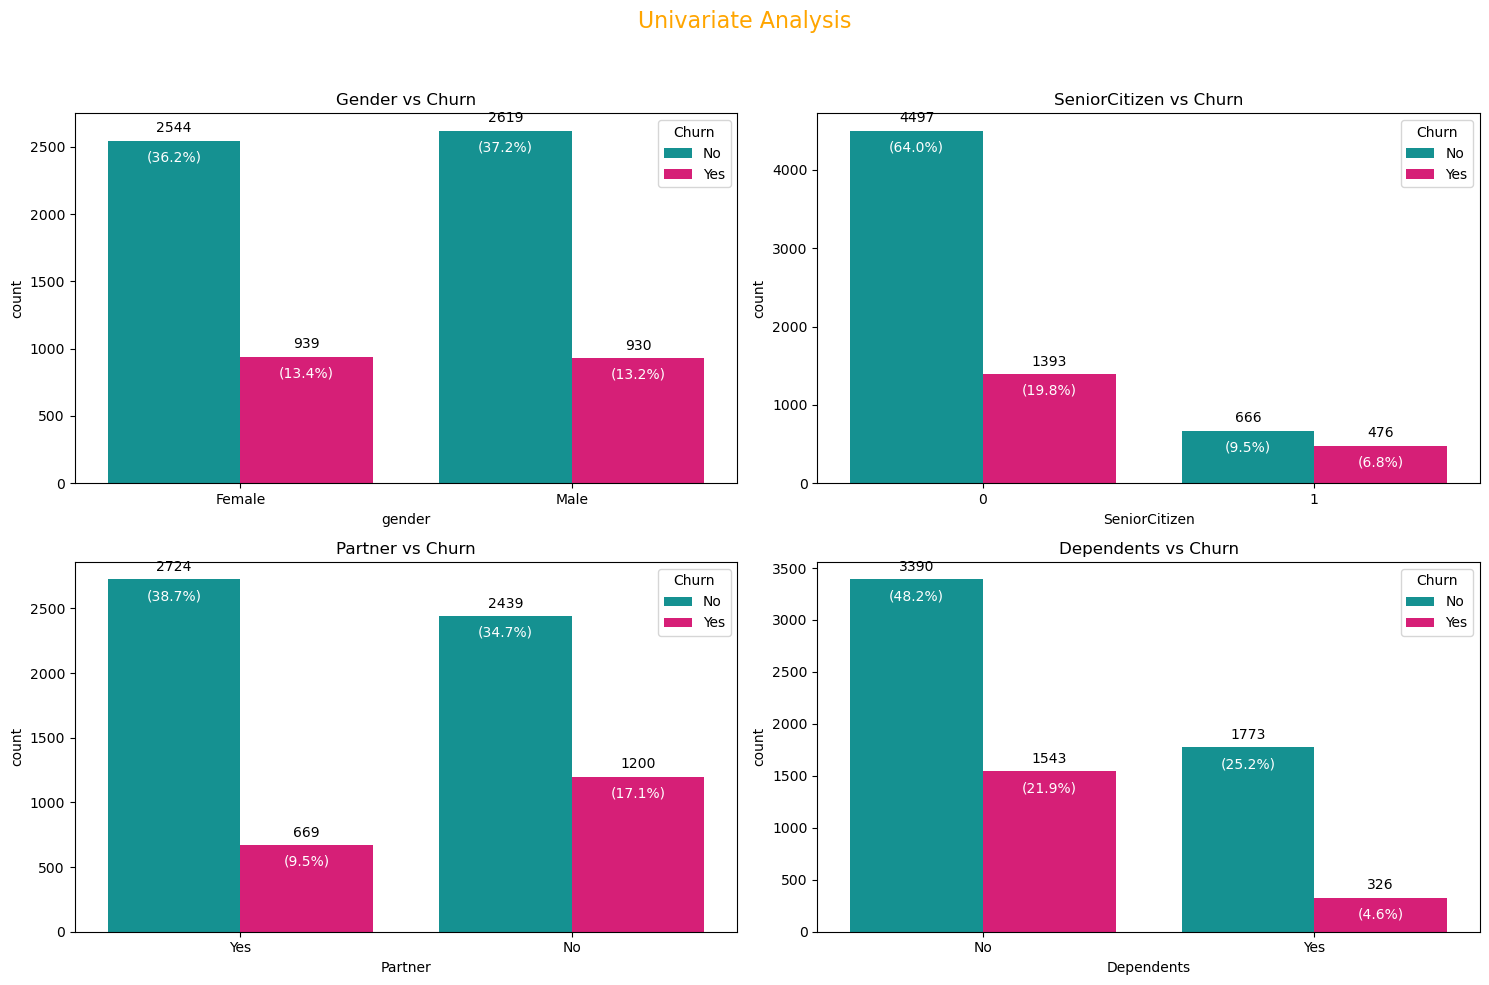

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Draw count plot for the 'gender' column with a custom color
sns.countplot(data=telco, x='gender', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Churn')

total_height_gender = len(telco['gender'])  # Total number of observations

# Add counts and percentages inside the bars for Gender plot
for p in axes[0, 0].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_gender:.1f}%'
    axes[0, 0].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[0, 0].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'SeniorCitizen' column with a custom color
sns.countplot(data=telco, x='SeniorCitizen', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[0, 1])
axes[0, 1].set_title('SeniorCitizen vs Churn')

total_height_senior = len(telco['SeniorCitizen'])  # Total number of observations

# Add counts and percentages inside the bars for SeniorCitizen plot
for p in axes[0, 1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_senior:.1f}%'
    axes[0, 1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[0, 1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'Partner' column with a custom color
sns.countplot(data=telco, x='Partner', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[1, 0])
axes[1, 0].set_title('Partner vs Churn')

total_height_partner = len(telco['Partner'])  # Total number of observations

# Add counts and percentages inside the bars for Partner plot
for p in axes[1, 0].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_partner:.1f}%'
    axes[1, 0].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1, 0].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Draw count plot for the 'Dependents' column with a custom color
sns.countplot(data=telco, x='Dependents', hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[1, 1])
axes[1, 1].set_title('Dependents vs Churn')

total_height_dependents = len(telco['Dependents'])  # Total number of observations

# Add counts and percentages inside the bars for Dependents plot
for p in axes[1, 1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_dependents:.1f}%'
    axes[1, 1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1, 1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()



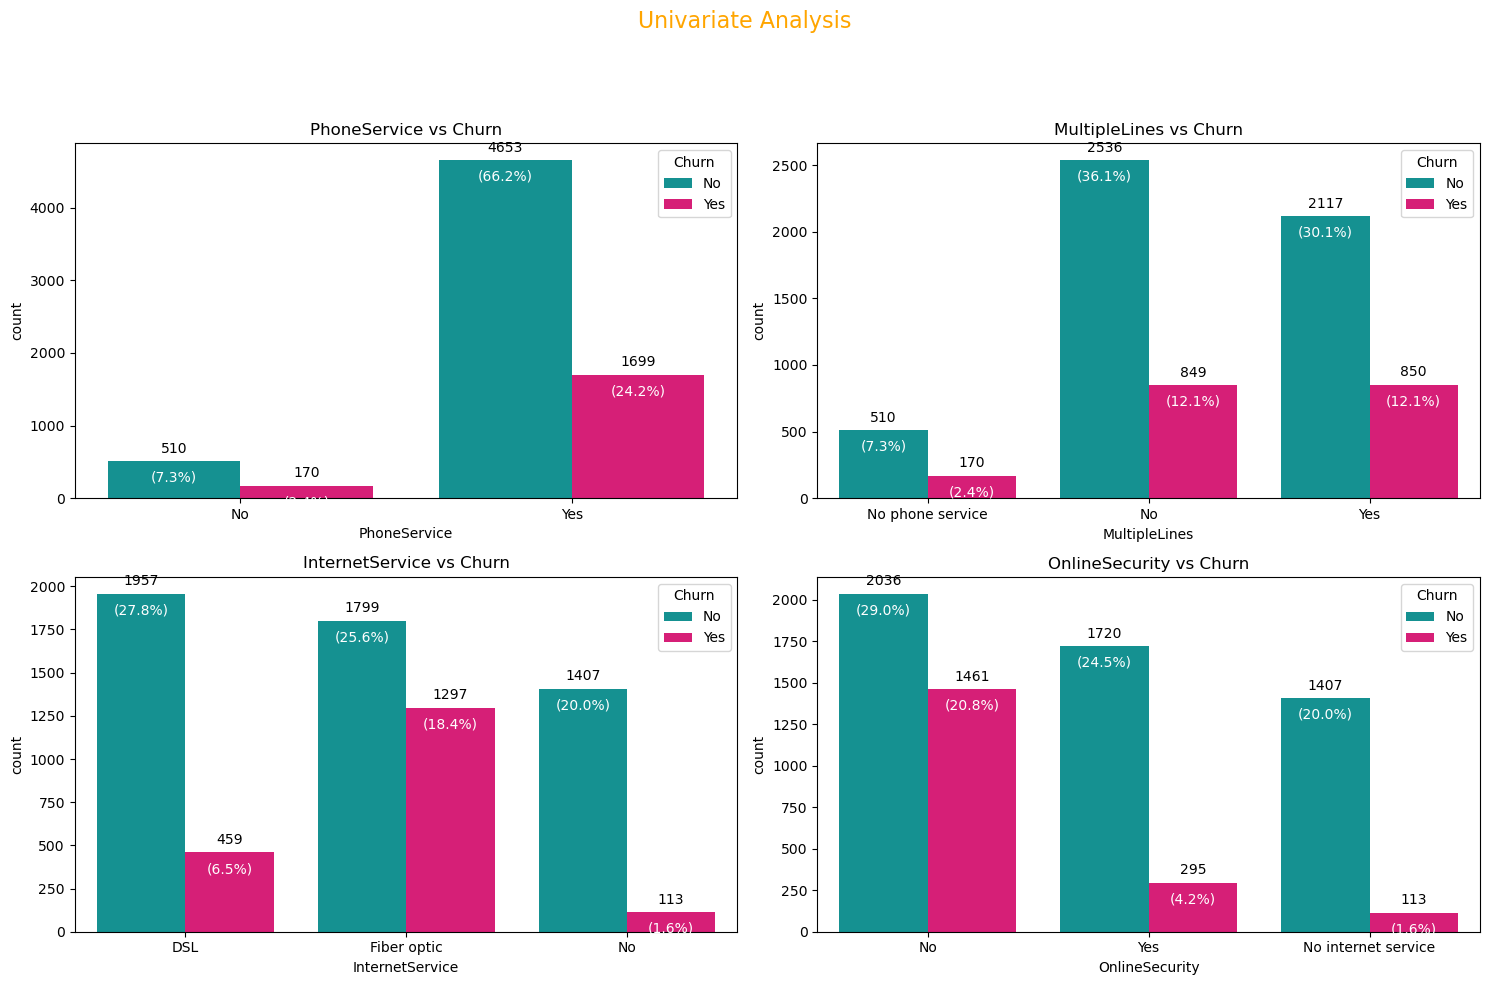

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# List of columns for analysis
columns_to_analyze = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adjust the rect parameter to control the spacing

# Show the plots
plt.show()



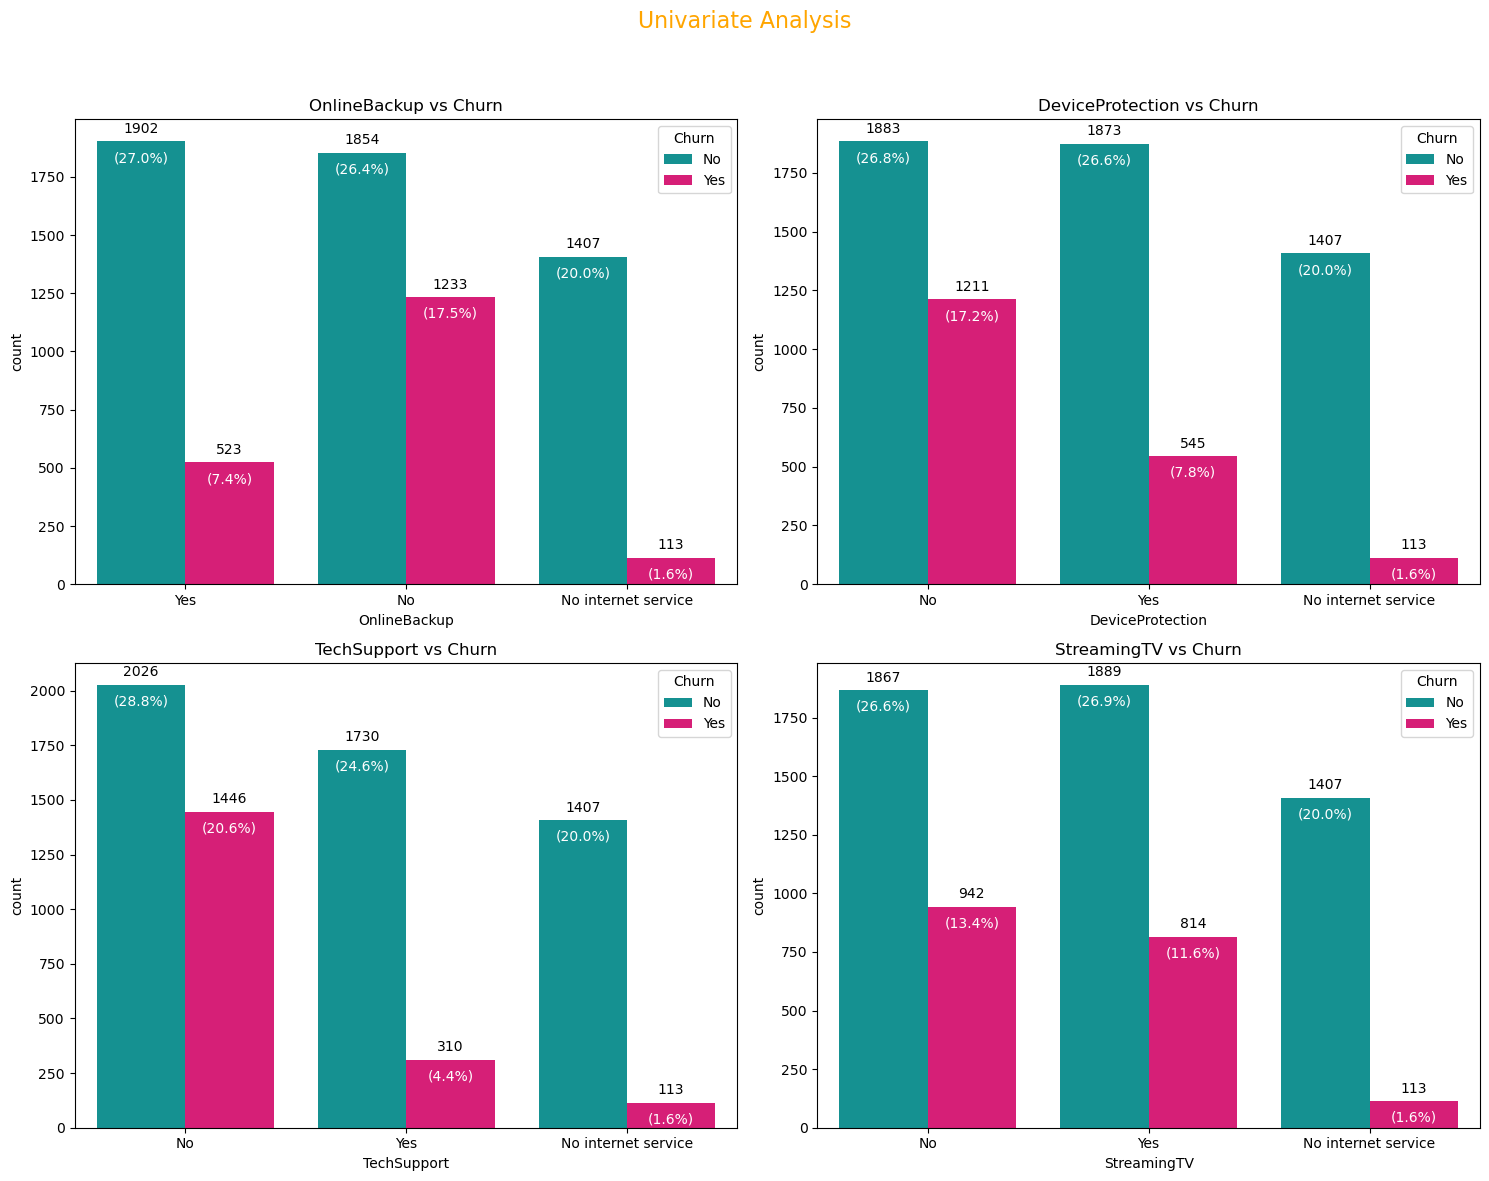

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# List of columns for analysis
columns_to_analyze = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


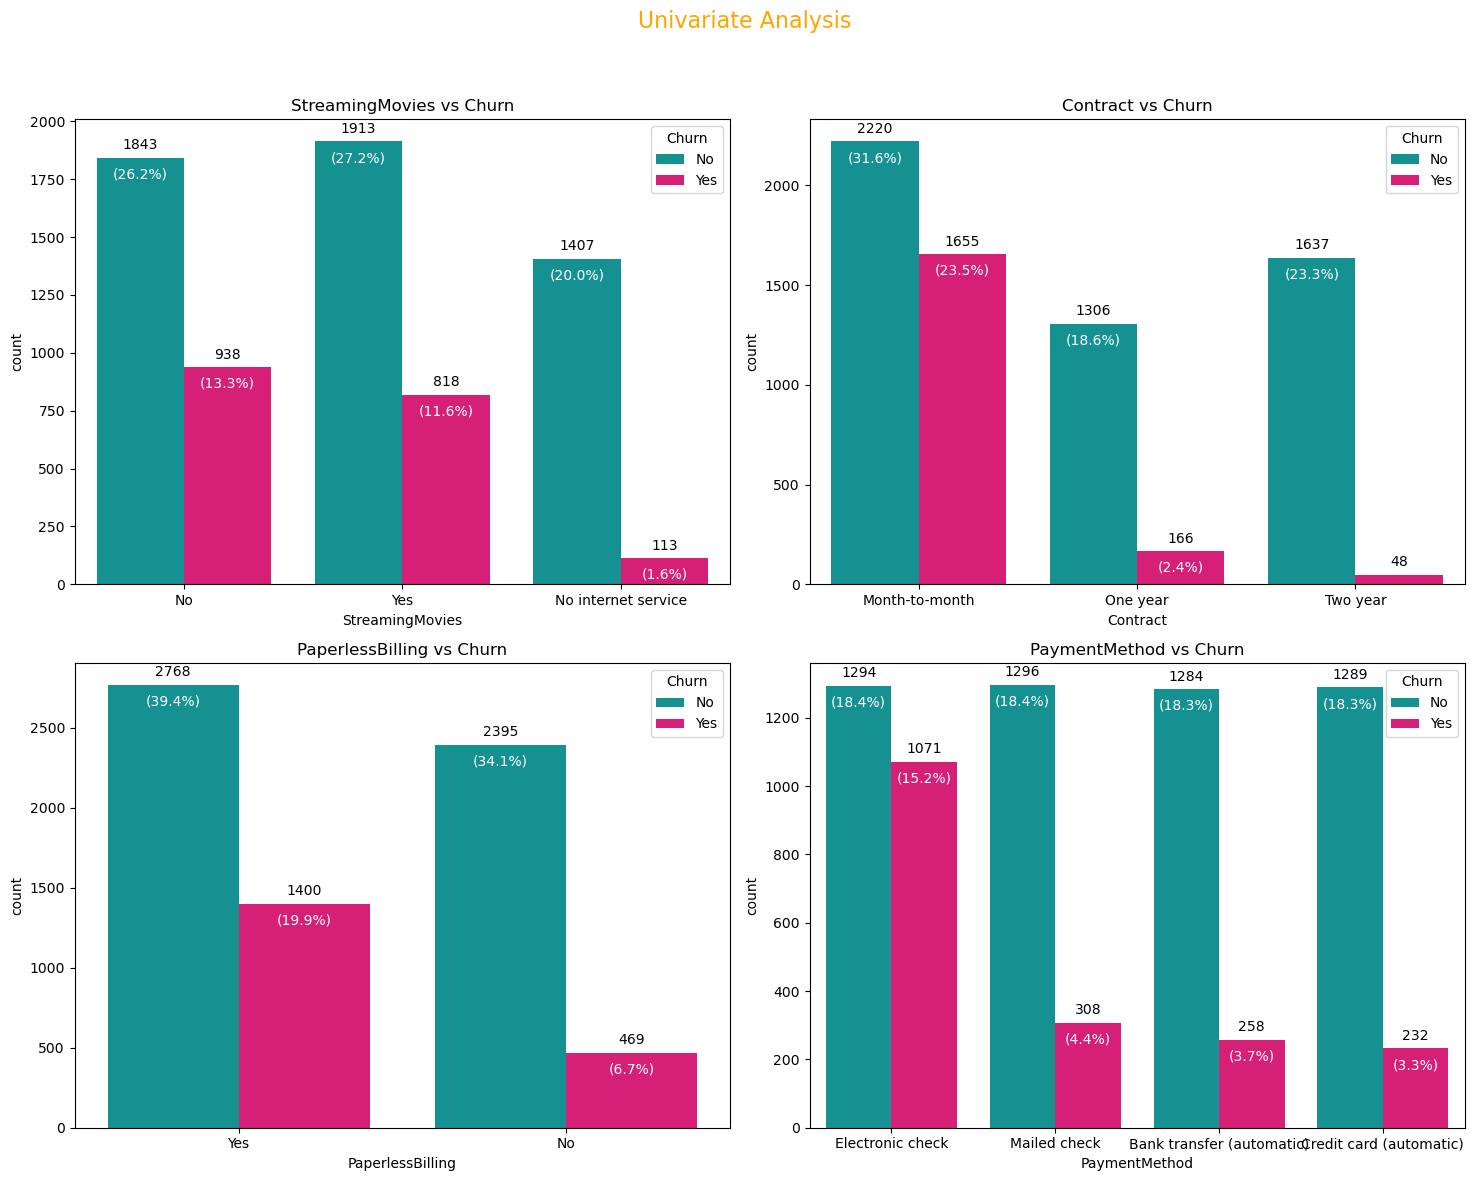

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up a 4x2 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# List of columns for analysis
columns_to_analyze = ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Iterate over columns and create countplots
for i, column in enumerate(columns_to_analyze):
    row_index = i // 2
    col_index = i % 2
    
    # Draw count plot for the current column with a custom color
    sns.countplot(data=telco, x=column, hue='Churn', palette=['#00A6A6', '#F40076'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{column} vs Churn')
    
    total_height_column = len(telco[column])  # Total number of observations

    # Add counts and percentages inside the bars
    for p in axes[row_index, col_index].patches:
        count_value = int(p.get_height())
        percentage = f'{100 * count_value / total_height_column:.1f}%'
        axes[row_index, col_index].annotate(f'({percentage})', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
        
        axes[row_index, col_index].annotate(f'{count_value}', 
                                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                                             ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Univariate Analysis', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


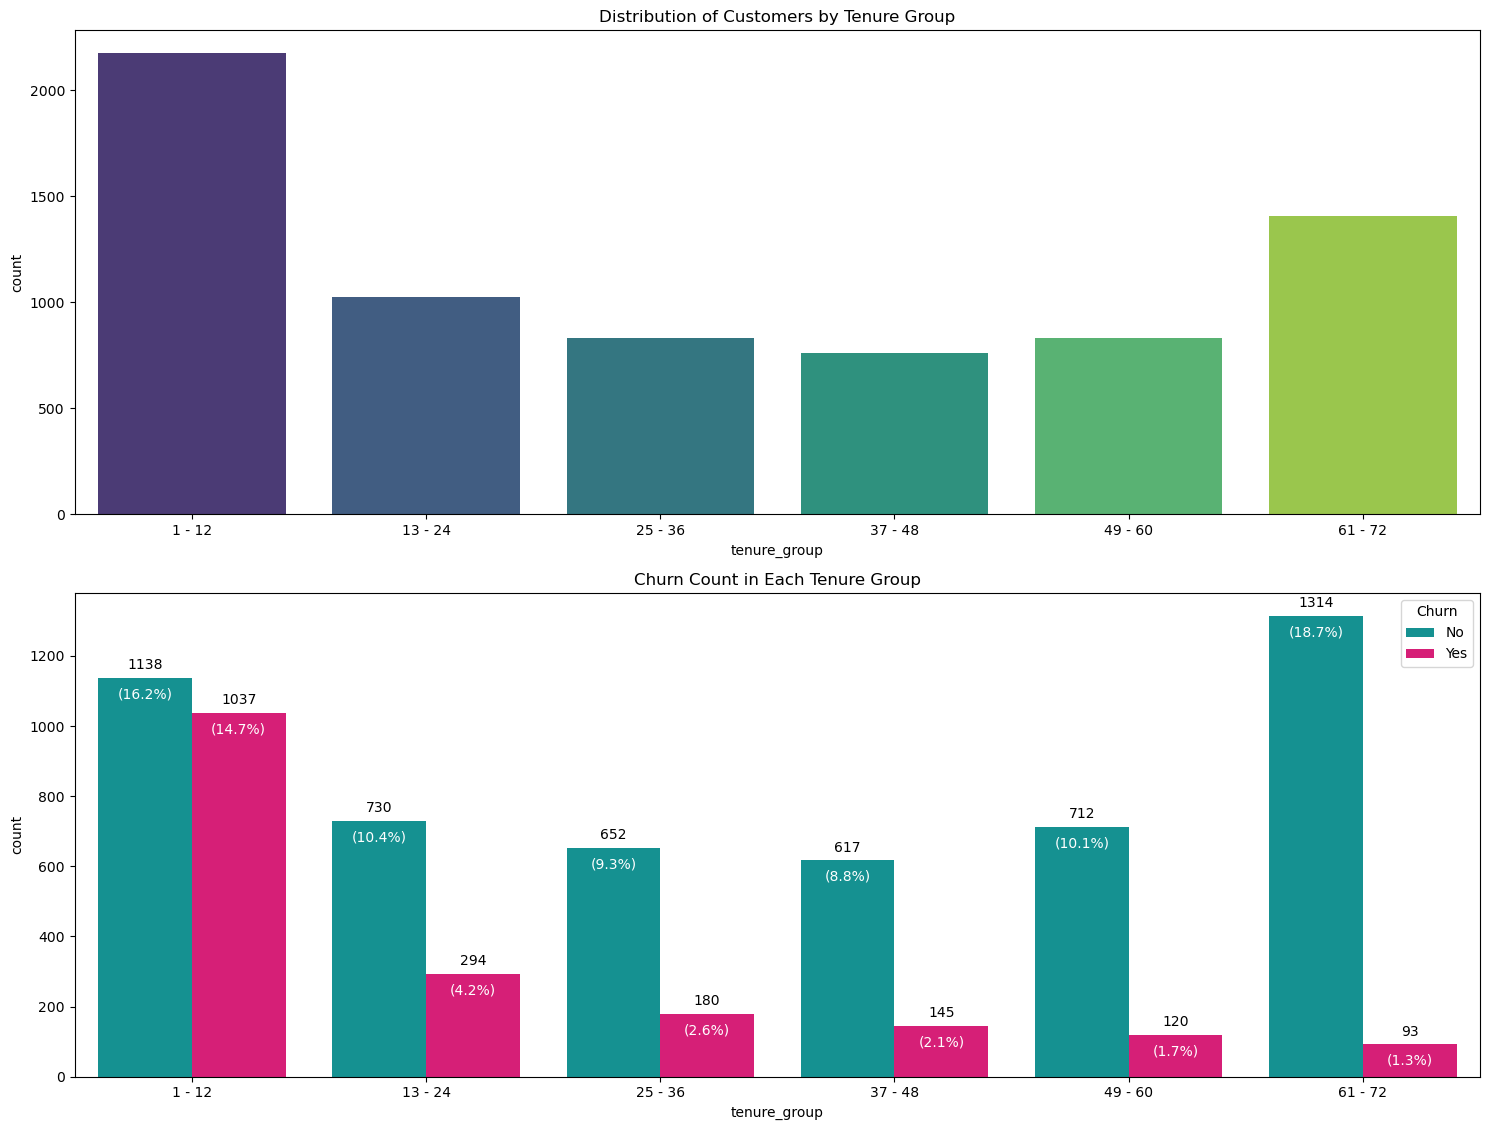

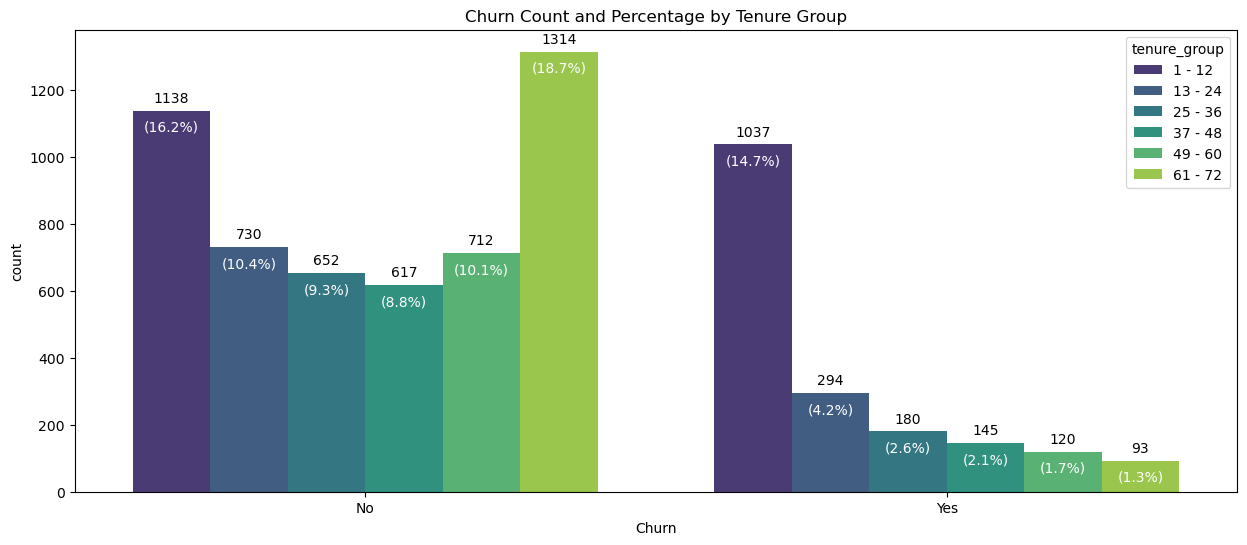

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set up a 2x1 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 'tenure_group' distribution
sns.countplot(data=telco, x='tenure_group', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Customers by Tenure Group')

# Plot 'Churn' count and percentage in each 'tenure_group'
sns.countplot(data=telco, x='tenure_group', hue='Churn', ax=axes[1], palette=['#00A6A6', '#F40076'])
axes[1].set_title('Churn Count in Each Tenure Group')

# Add counts and percentages inside the bars for 'Churn' plot
total_height_churn = len(telco['tenure_group'])  # Total number of observations
for p in axes[1].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_churn:.1f}%'
    axes[1].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[1].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Create a new figure for the combined plot
fig, axes_combined = plt.subplots(figsize=(15, 6))

# Plot 'Churn' count and percentage for the entire dataset
sns.countplot(data=telco, x='Churn', hue='tenure_group', palette='viridis', ax=axes_combined)

# Add counts and percentages inside the bars for the combined plot
total_height_combined = len(telco['Churn'])
for p in axes_combined.patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_combined:.1f}%'
    axes_combined.annotate(f'({percentage})', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes_combined.annotate(f'{count_value}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

plt.title('Churn Count and Percentage by Tenure Group')
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_30492\224239934.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=telco, x='MonthlyCharges', ax=axes[1], bins=30, kde=True, palette='magma')


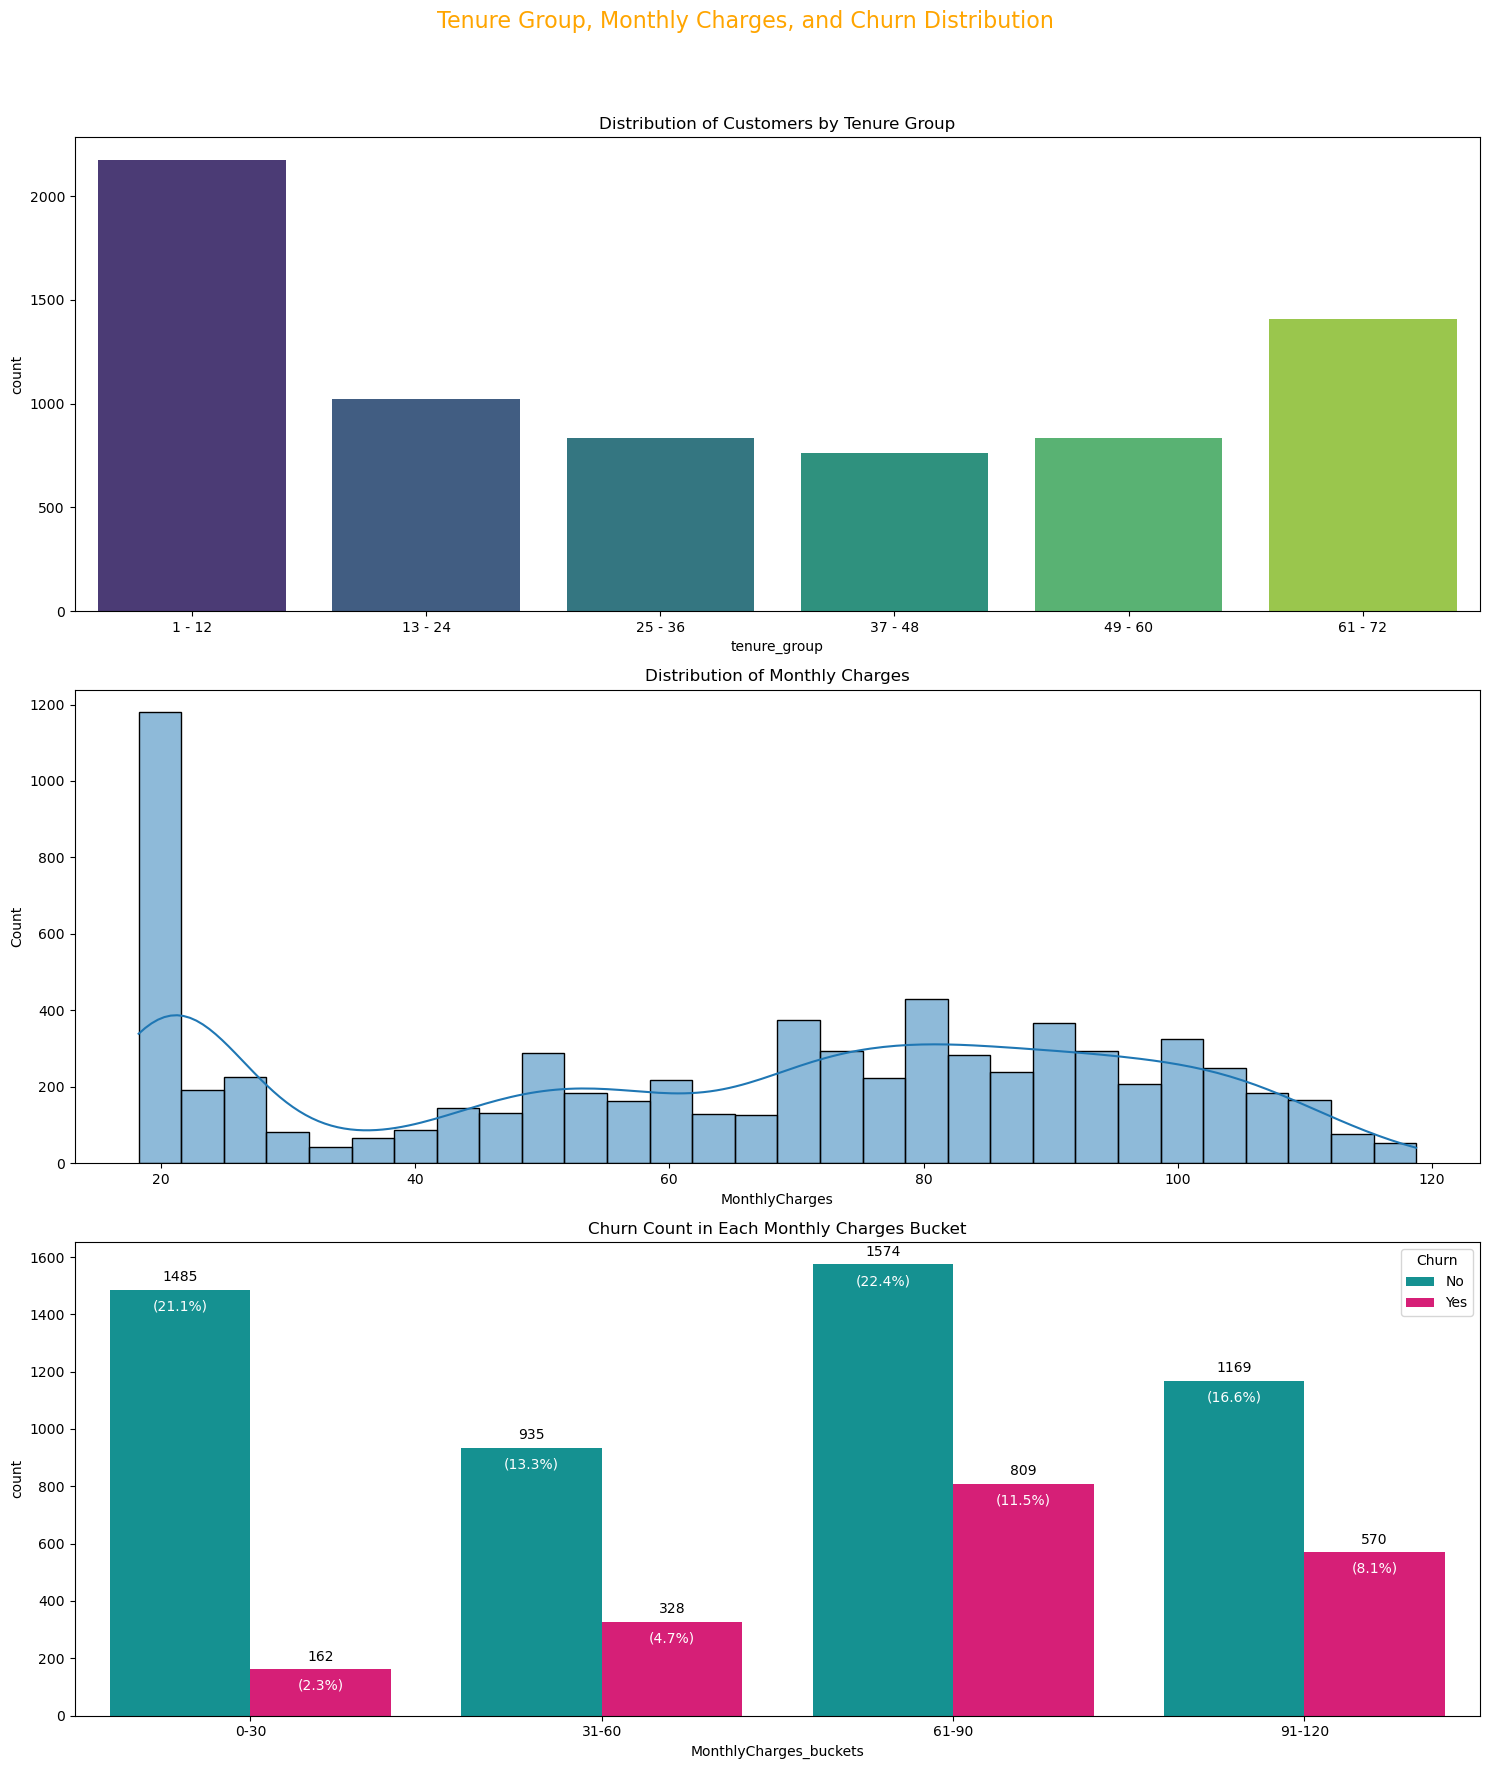

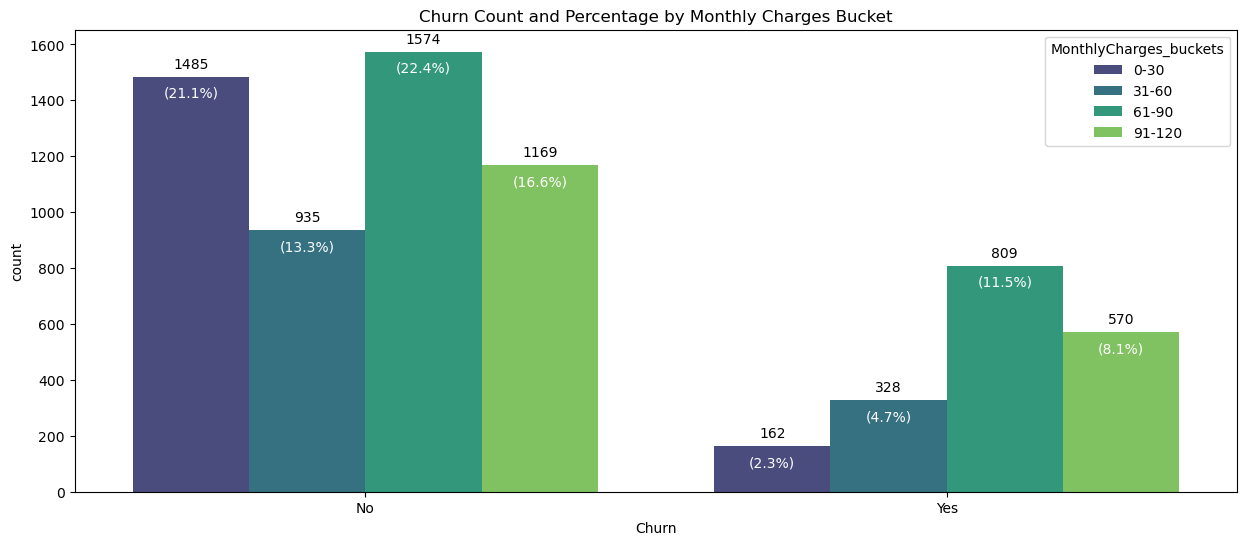

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create bins for 'MonthlyCharges'
telco['MonthlyCharges_buckets'] = pd.cut(telco['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '31-60', '61-90', '91-120'])

# Set up a 3x1 grid for subplots with an adjusted figure size
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Plot 'tenure_group' distribution
sns.countplot(data=telco, x='tenure_group', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Customers by Tenure Group')

# Plot 'MonthlyCharges' distribution
sns.histplot(data=telco, x='MonthlyCharges', ax=axes[1], bins=30, kde=True, palette='magma')
axes[1].set_title('Distribution of Monthly Charges')

# Plot 'Churn' count and percentage in each 'MonthlyCharges_buckets' bin
sns.countplot(data=telco, x='MonthlyCharges_buckets', hue='Churn', ax=axes[2], palette=['#00A6A6', '#F40076'])
axes[2].set_title('Churn Count in Each Monthly Charges Bucket')

# Add counts and percentages inside the bars for 'Churn' plot
total_height_churn = len(telco['MonthlyCharges_buckets'])  # Total number of observations
for p in axes[2].patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_churn:.1f}%'
    axes[2].annotate(f'({percentage})', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes[2].annotate(f'{count_value}', 
                     (p.get_x() + p.get_width() / 2., p.get_height() if not pd.isna(p.get_height()) else 0), 
                     ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

# Set a common title for the set of plots
plt.suptitle('Tenure Group, Monthly Charges, and Churn Distribution', fontsize=16, color='orange')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Combine the three plots into a single stacked bar chart
fig, axes_combined = plt.subplots(figsize=(15, 6))

# Plot 'Churn' count and percentage for the entire dataset
sns.countplot(data=telco, x='Churn', hue='MonthlyCharges_buckets', palette='viridis', ax=axes_combined)

# Add counts and percentages inside the bars for the combined plot
total_height_combined = len(telco['Churn'])
for p in axes_combined.patches:
    count_value = int(p.get_height())
    percentage = f'{100 * count_value / total_height_combined:.1f}%'
    axes_combined.annotate(f'({percentage})', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', xytext=(0, -12), textcoords='offset points', color='white')
    
    axes_combined.annotate(f'{count_value}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', xytext=(0, 4), textcoords='offset points')

plt.title('Churn Count and Percentage by Monthly Charges Bucket')
plt.show()


In [27]:
telco['Churn'] = np.where(telco.Churn == 'Yes',1,0)

In [28]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_buckets
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12,0-30
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36,31-60
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12,31-60
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48,31-60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12,61-90


In [29]:
#telco['tenure_group'].unique()

### 3.Convert all the categorical variables into dummy variables

In [30]:
telco_dummies = pd.get_dummies(telco).astype(int)
telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29,29,0,1,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
1,56,1889,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,53,108,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
3,42,1840,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
4,70,151,1,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


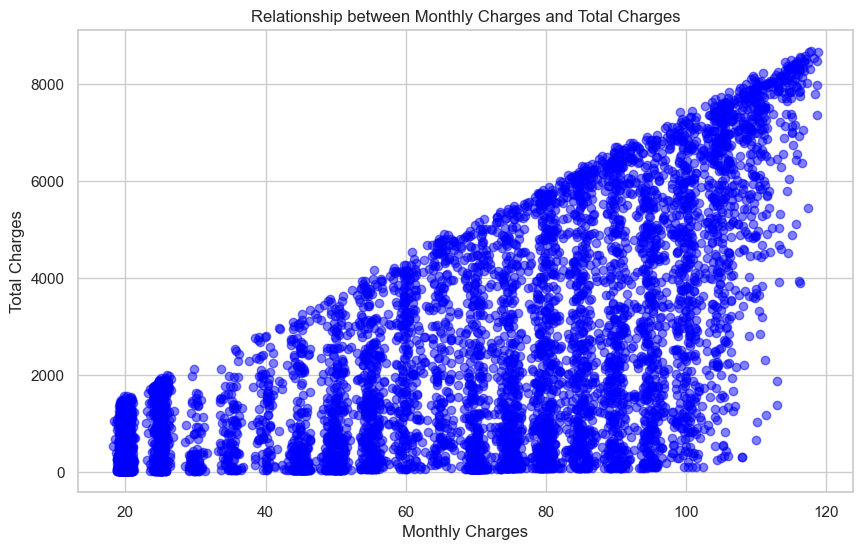

In [43]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(telco['MonthlyCharges'], telco_dummies['TotalCharges'], color='Blue', alpha=0.5)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

###  5.Churn by Monthly Charges

In [32]:
telco_dummies = pd.get_dummies(telco)
telco_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,MonthlyCharges_buckets_0-30,MonthlyCharges_buckets_31-60,MonthlyCharges_buckets_61-90,MonthlyCharges_buckets_91-120
0,29.85,29.85,0,True,False,True,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False
2,53.85,108.15,1,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
4,70.70,151.65,1,True,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False


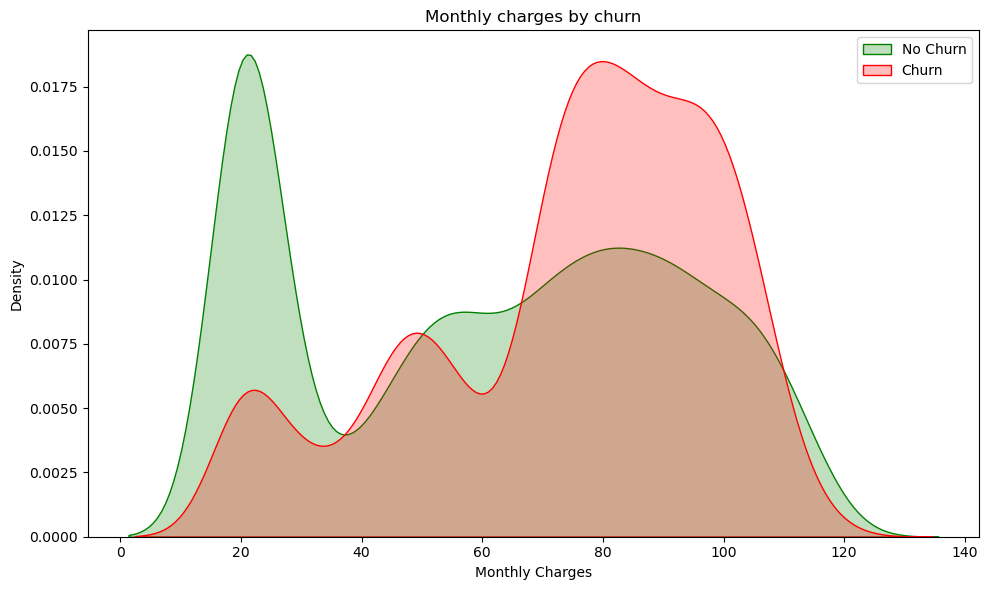

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Kernel Density Plot
Mth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 0)],
                  color="Green", fill=True, ax=ax, label="No Churn")

Mth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 1)],
                  color="Red", fill=True, ax=Mth, label="Churn")

# Legend
ax.legend(["No Churn", "Churn"])

# Labels and Title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly charges by churn')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### <span style="color:Red;">Insight: Churn is high when Monthly Charges ar high

  Certainly! Here's a summary of the insights and implications for telecom customer churn analysis:

1. Price sensitivity: Higher monthly charges may lead to increased churn if customers perceive the value received as insufficient or overpriced.
2. Competitive alternatives: Customers may switch to cheaper alternatives if they perceive that their current provider's prices are too high.
3. Billing transparency: Unexpected or unjustified price hikes can lead to mistrust and increased churn.
4. Service value: The value provided by the service must justify the price point to retain customers.
5. Customer segmentation: Not all customers are equally sensitive to price increases, so a nuanced approach to pricing and retention strategies is necessary.
6. Retention strategies: Personalized retention strategies can help reduce churn among high-paying customers.
7. Market positioning: If a company is positioned as a value provider, high charges can misalign with the brand and cause customers to leave.
8. Financial stress: Larger bills can lead to financial strain for customers, which can be a practical driver of churn.


###  6.Churn by Total Charges

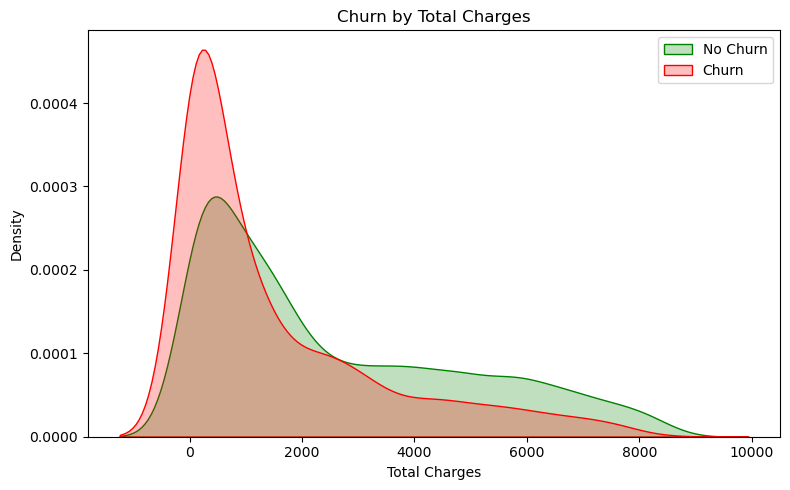

In [34]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Kernel Density Plot for Total Charges
total_charges_plot = sns.kdeplot(telco_dummies['TotalCharges'][(telco_dummies['Churn'] == 0)],
                                 color='Green', fill=True, ax=ax, label='No Churn')

total_charges_plot = sns.kdeplot(telco_dummies['TotalCharges'][(telco_dummies['Churn'] == 1)],
                                 color='Red', fill=True, ax=total_charges_plot, label='Churn')

# Legend
ax.legend(['No Churn', 'Churn'])

# Labels and Title
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Churn by Total Charges')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##### <span style="color:Red;">Insight:higher Churn at lower Total Charges

In telecom customer churn analysis, the phenomenon of higher churn rate at lower charges can be attributed to several factors. Let’s explore this in more detail:

Monthly Charges and Total Charges Relationship:

When analyzing customer churn, we often consider factors such as tenure, monthly charges, and total charges.
Higher monthly charges can lead to lower tenure (i.e., shorter duration of service), which in turn results in lower total charges.
Here’s how these three factors are linked:
Higher Monthly Charge: Customers who pay higher monthly charges may find it expensive or less sustainable over time.
Lower Tenure: New customers or those with shorter tenure are more likely to churn because they haven’t yet established a long-term relationship with the telecom provider.
Lower Total Charge: Since tenure is shorter, the cumulative total charges (over the entire period) are lower for these customers.
Therefore, the combination of higher monthly charges and lower tenure contributes to a higher churn rate.

### Build a corelation of all predictors with 'Churn'

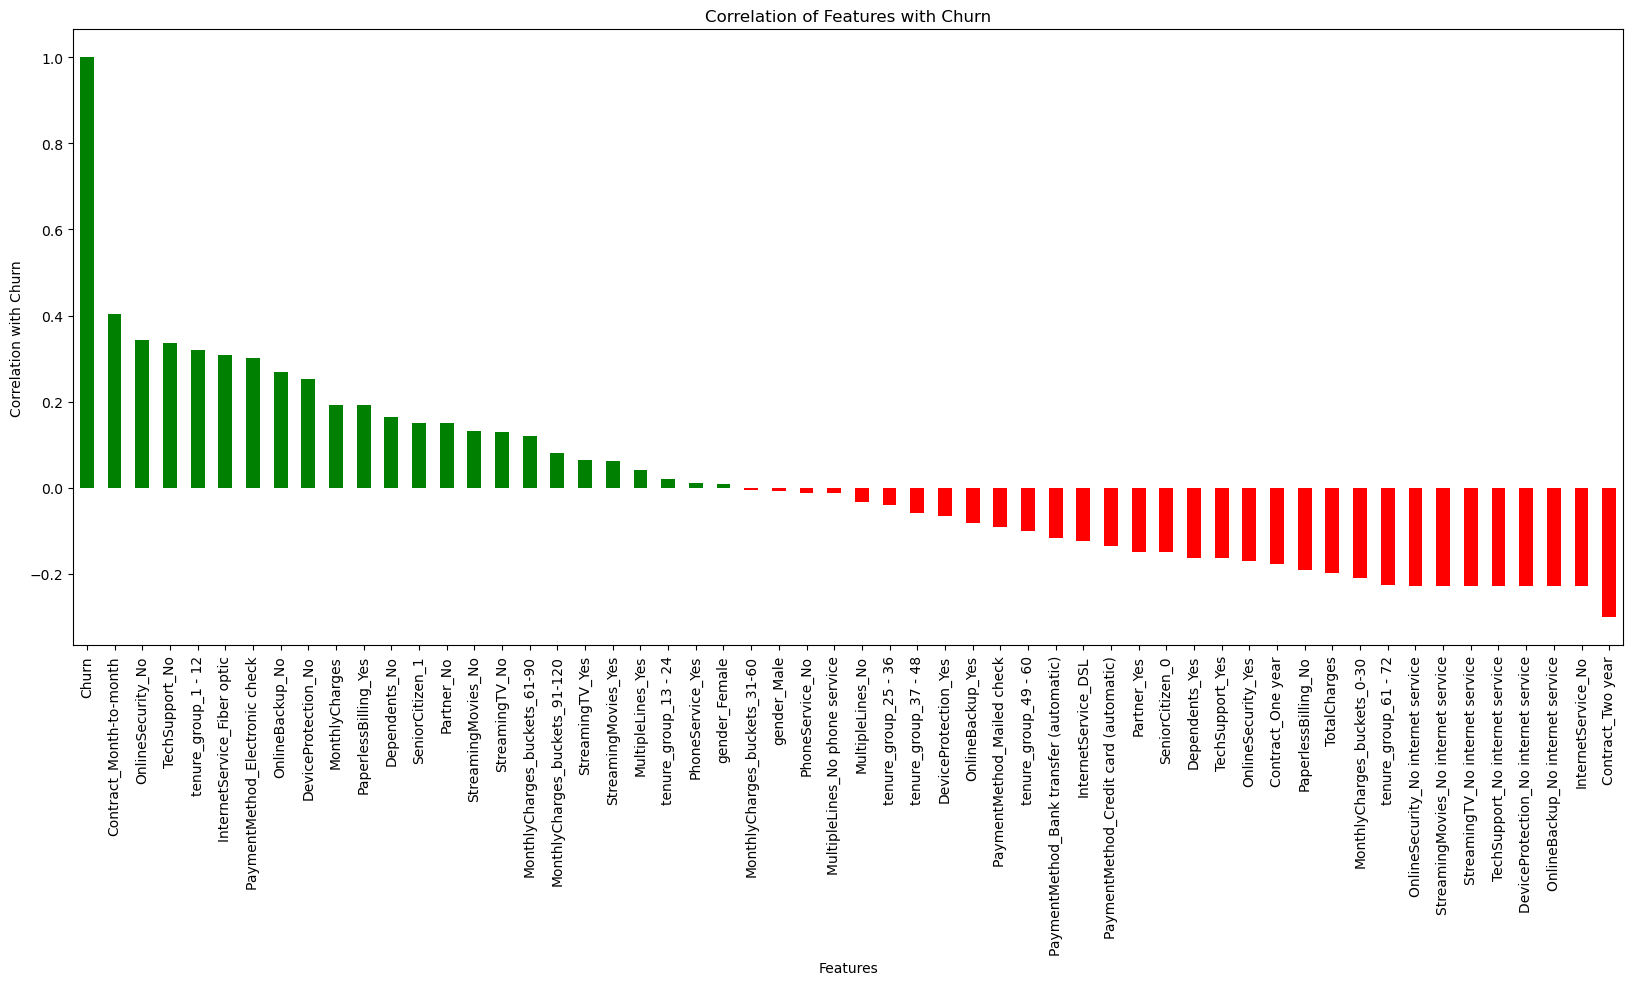

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 8))

# Calculate correlation and sort by values
correlation_data = telco_dummies.corr()['Churn'].sort_values(ascending=False)

# Define colors for positive and negative correlations
colors = ['green' if corr > 0 else 'red' for corr in correlation_data]

# Create a bar plot
correlation_data.plot(kind='bar', color=colors)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')

# Show the plot
plt.show()

##### Derived Insight:

**HIGH Churn** seen in case of **Month to month contracts, No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

**LOW Churn** is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender, Availability of PhoneService** and **of multiple lines** have alomost **No impact on Churn**

### We can use Heapmap for visualizing and analyzing customer churn patterns

<Axes: >

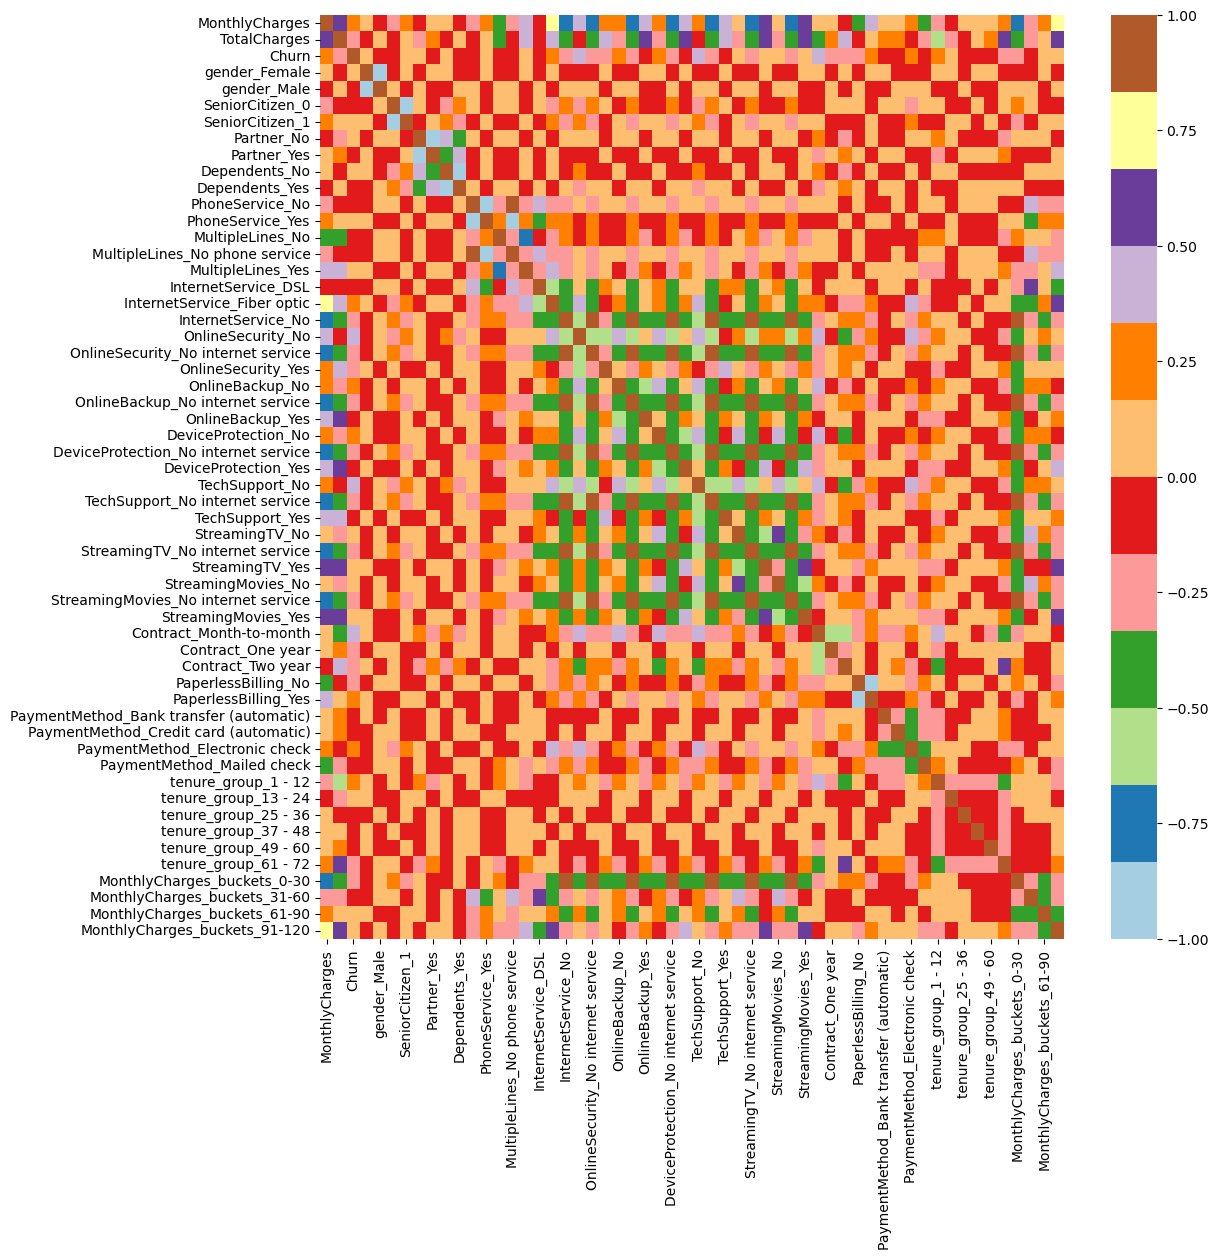

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_dummies.corr(), cmap="Paired")

### Bivariate_analysis

<Figure size 1400x800 with 0 Axes>

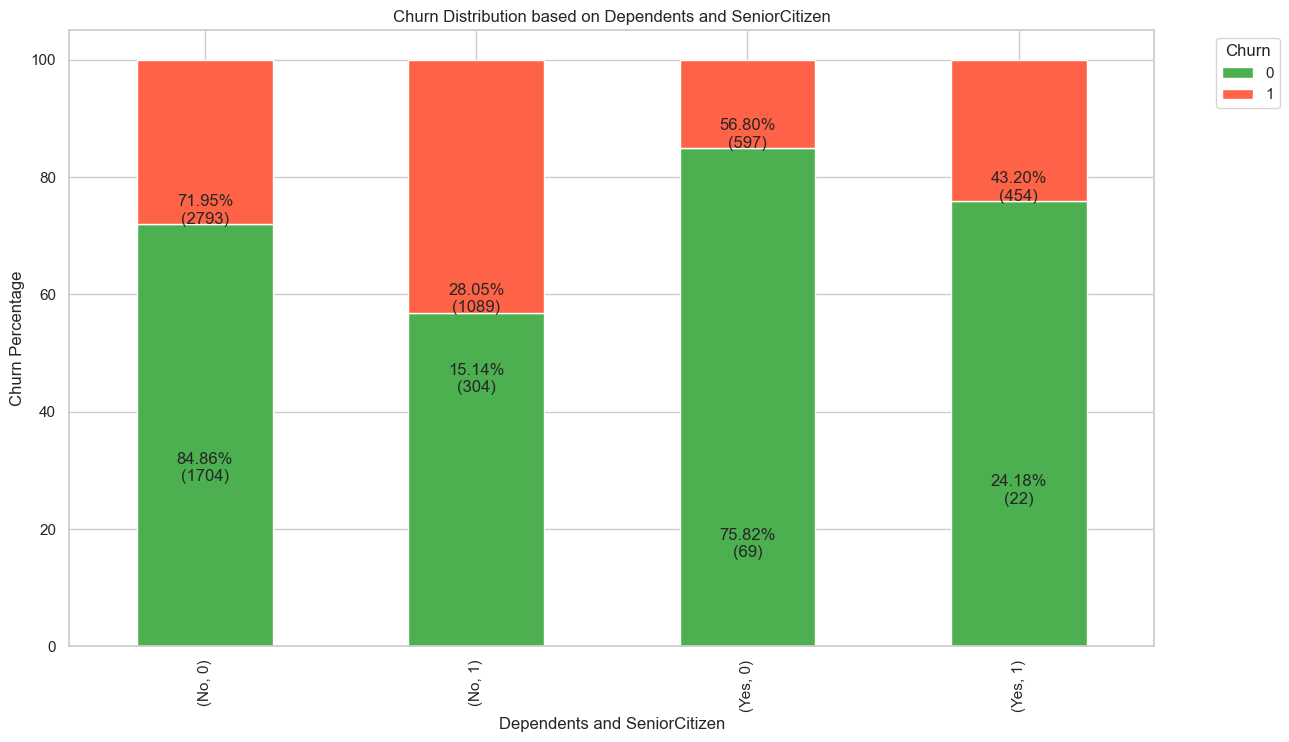

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Calculate churn percentages and counts
churn_data = telco.groupby(['Dependents', 'SeniorCitizen'])['Churn'].value_counts(normalize=True).mul(100).unstack().fillna(0)
churn_counts = telco.groupby(['Dependents', 'SeniorCitizen'])['Churn'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
churn_data.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF6347'], figsize=(14, 8))

# Display percentages and counts on top of the bars
for idx, p in enumerate(plt.gca().patches):
    percentage = churn_data.values.flatten()[idx]
    count = churn_counts.values.flatten()[idx]
    
    plt.gca().annotate(f'{percentage:.2f}%\n({count})', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Churn Distribution based on Dependents and SeniorCitizen')
plt.xlabel('Dependents and SeniorCitizen')
plt.ylabel('Churn Percentage')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<Figure size 1400x800 with 0 Axes>

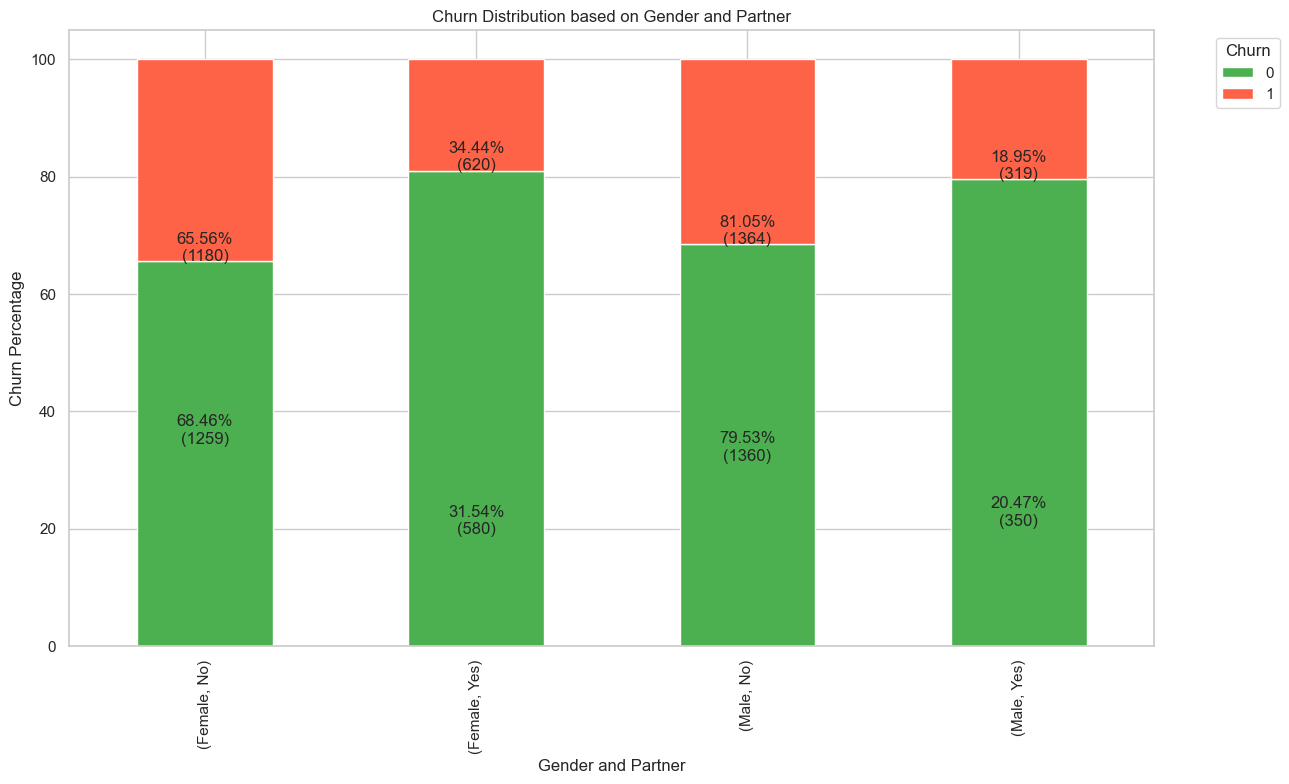

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Calculate churn percentages and counts
churn_data = telco.groupby(['gender', 'Partner'])['Churn'].value_counts(normalize=True).mul(100).unstack().fillna(0)
churn_counts = telco.groupby(['gender', 'Partner'])['Churn'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
churn_data.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF6347'], figsize=(14, 8))

# Display percentages and counts on top of the bars
for idx, p in enumerate(plt.gca().patches):
    percentage = churn_data.values.flatten()[idx]
    count = churn_counts.values.flatten()[idx]
    
    plt.gca().annotate(f'{percentage:.2f}%\n({count})', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Churn Distribution based on Gender and Partner')
plt.xlabel('Gender and Partner')
plt.ylabel('Churn Percentage')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


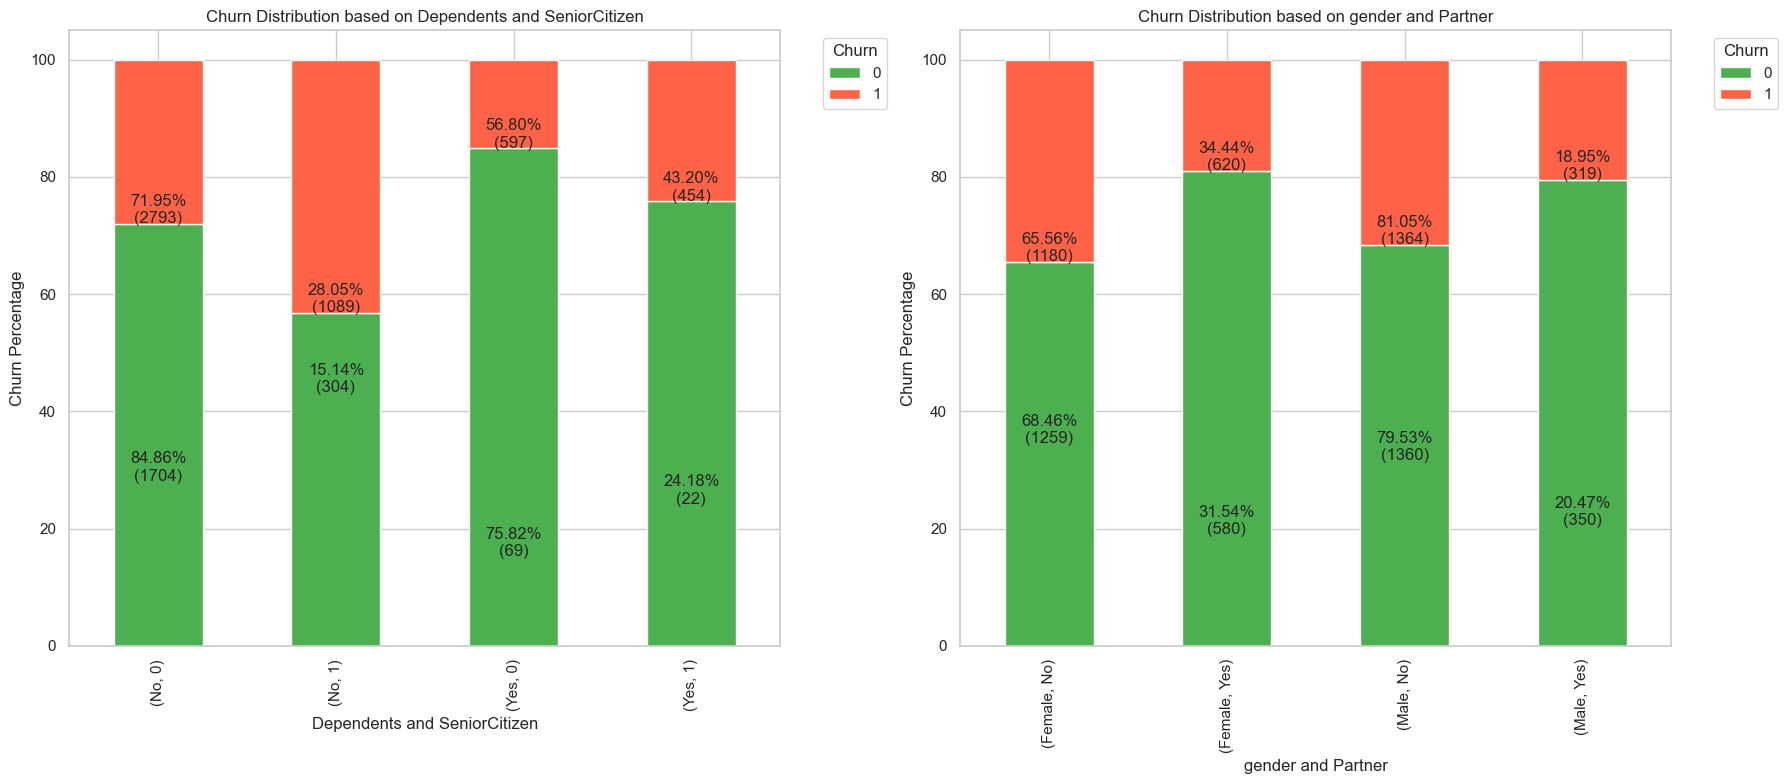

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming telco is your DataFrame
sns.set(style="whitegrid")

# Define the pairs of columns
column_pairs = [('Dependents', 'SeniorCitizen'), ('gender', 'Partner')]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(column_pairs), figsize=(18, 8))

for i, (col1, col2) in enumerate(column_pairs):
    # Calculate churn percentages and counts for the current pair
    churn_data = telco.groupby([col1, col2])['Churn'].value_counts(normalize=True).mul(100).unstack().fillna(0)
    churn_counts = telco.groupby([col1, col2])['Churn'].value_counts().unstack().fillna(0)

    # Create a stacked bar plot for the current pair
    churn_data.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF6347'], ax=axes[i])

    # Display percentages and counts on top of the bars for the current pair
    for idx, p in enumerate(axes[i].patches):
        percentage = churn_data.values.flatten()[idx]
        count = churn_counts.values.flatten()[idx]

        axes[i].annotate(f'{percentage:.2f}%\n({count})',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    axes[i].set_title(f'Churn Distribution based on {col1} and {col2}')
    axes[i].set_xlabel(f'{col1} and {col2}')
    axes[i].set_ylabel('Churn Percentage')
    axes[i].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [40]:
# Analysis of state and charged_off percentage 

#df = telco.groupby('gender').agg({'Charged Off':'sum', 'Fully Paid':'sum'})
#df['Total_Count'] = df['Charged Off'] + df['Fully Paid']
#df['Charged_Off_Percentage'] = round(100*df['Charged Off']/df['Total_Count'],2)
#df.sort_values(by = ['Charged_Off_Percentage'], inplace=True)
#df

In [41]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_buckets
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12,0-30
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36,31-60
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12,31-60
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48,31-60
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12,61-90
